# Análisis exploratorio de datos
---

## Paso 1. Fijar cuál es el problema a resolver o el objetivo del análisis:
Objetivo principal: Realizar un modelo que pueda estimar el precio de un diamante dadas sus características, con el objetivo de poder evaluar qué tan costosos son los diamantes robados del señor Krenk.

## Paso 2. Obtener una idea general de nuestro set de datos:

### 2.1 Importar las librerías que utilizaremos inicialmente

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math

### 2.2 Cargar datos

In [70]:
# Datos del archivo 'diamonds.csv'
df_diamonds = pd.read_csv('diamonds.csv', index_col=0)
df_diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [71]:
# Datos del archivo 'coords_diamonds.csv'
df_coords = pd.read_csv('coords_diamonds.csv', index_col=0)
df_coords.head()

,latitude,longitude
0,39.8813889,-83.093056
1,33.4150000,-111.548889
2,40.1672222,-105.101389
3,37.3711111,-85.583056
4,48.5394444,-121.745000


In [72]:
# Unimos ambos DataFrames para conservar la información en uno solo.
df_diamonds = pd.concat([df_diamonds, df_coords], axis=1)
df_diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z,latitude,longitude
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,39.8813889,-83.093056
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,33.4150000,-111.548889
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,40.1672222,-105.101389
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,37.3711111,-85.583056
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,48.5394444,-121.745000
...,...,...,...,...,...,...,...,...,...,...,...,...
53925,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,38.5816667,-121.493333
53926,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,32.436381,-111.222442
53927,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,40.2413889,-75.284167
53928,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,38.8222222,-122.721944


### 2.3 Limpieza y cambios generales de los datos

In [73]:
# Eliminamos los espacios en blanco que podrían encontrarse en los extremos de los nombres de las columnas.
stripped_col_names = []
for column in df_diamonds.columns:
    stripped_col_names.append(column.strip())

df_diamonds.columns = stripped_col_names

In [74]:
# Eliminamos los espacios en blanco que podrían encontrarse en los extremos de las cadenas de texto de las variables categóricas.
for column in df_diamonds.select_dtypes(include=np.object_):
    df_diamonds[column] = df_diamonds[column].apply(lambda x: x.strip())

In [75]:
# Cambiamos el nombre de las columnas para que sea más claro la característica que representa cada variable
df_diamonds.rename(columns={'carat':'weight', 
                            'cut':'cut_quality', 
                            'depth':'depth_percentage', 
                            'x':'length', 
                            'y':'width', 
                            'z':'depth'}, inplace=True)
df_diamonds

,weight,cut_quality,color,clarity,depth_percentage,table,price,length,width,depth,latitude,longitude
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,39.8813889,-83.093056
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,33.4150000,-111.548889
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,40.1672222,-105.101389
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,37.3711111,-85.583056
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,48.5394444,-121.745000
...,...,...,...,...,...,...,...,...,...,...,...,...
53925,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,38.5816667,-121.493333
53926,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,32.436381,-111.222442
53927,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,40.2413889,-75.284167
53928,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,38.8222222,-122.721944


In [76]:
# Cambiamos el orden de las columnas del DataFrame
df_diamonds = df_diamonds[['weight', 'depth_percentage', 'table', 'length', 'width', 'depth', 'latitude', 'longitude', 'cut_quality', 'color', 'clarity', 'price']]
df_diamonds

,weight,depth_percentage,table,length,width,depth,latitude,longitude,cut_quality,color,clarity,price
0,0.23,61.5,55.0,3.95,3.98,2.43,39.8813889,-83.093056,Ideal,E,SI2,326
1,0.21,59.8,61.0,3.89,3.84,2.31,33.4150000,-111.548889,Premium,E,SI1,326
2,0.23,56.9,65.0,4.05,4.07,2.31,40.1672222,-105.101389,Good,E,VS1,327
3,0.29,62.4,58.0,4.20,4.23,2.63,37.3711111,-85.583056,Premium,I,VS2,334
4,0.31,63.3,58.0,4.34,4.35,2.75,48.5394444,-121.745000,Good,J,SI2,335
...,...,...,...,...,...,...,...,...,...,...,...,...
53925,0.72,60.8,57.0,5.75,5.76,3.50,38.5816667,-121.493333,Ideal,D,SI1,2757
53926,0.72,63.1,55.0,5.69,5.75,3.61,32.436381,-111.222442,Good,D,SI1,2757
53927,0.70,62.8,60.0,5.66,5.68,3.56,40.2413889,-75.284167,Very Good,D,SI1,2757
53928,0.86,61.0,58.0,6.15,6.12,3.74,38.8222222,-122.721944,Premium,H,SI2,2757


In [77]:
# Revisamos si existen registros duplicados
duplicates = df_diamonds[df_diamonds.duplicated()].reset_index()
duplicates

,index,weight,depth_percentage,table,length,width,depth,latitude,longitude,cut_quality,color,clarity,price


No existen valores duplicados.

### 2.4 Inspección inicial de los datos

In [78]:
# Revisamos la dimensionalidad de nuestro set de datos
df_diamonds.shape

(53930, 12)

Obervaciones:
* El set de datos contiene 53,930 filas y 12 columnas.

In [79]:
df_diamonds.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53930 entries, 0 to 53929
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   weight            53930 non-null  float64
 1   depth_percentage  50968 non-null  float64
 2   table             53930 non-null  float64
 3   length            52840 non-null  float64
 4   width             53345 non-null  float64
 5   depth             53930 non-null  float64
 6   latitude          53930 non-null  object 
 7   longitude         53930 non-null  float64
 8   cut_quality       53930 non-null  object 
 9   color             53930 non-null  object 
 10  clarity           53930 non-null  object 
 11  price             53930 non-null  int64  
dtypes: float64(7), int64(1), object(4)
memory usage: 5.3+ MB


Observaciones:
* Existen variables con diferente tipo de datos como int64 y float64 (numérico) y variables tipo object (categórico)
* El DataFrame contiene algunas columnas con valores faltantes
* La columna 'latitude' de nuestro DataFrame presenta valores numéricos decimales (float). Sin embargo, la función .info() de pandas nos muestra que los valores de esta columna son de tipo 'object'. Para realizar los procesos futuros y mantener la congruencia de nuestros datos, se debe de cambiar el tipo de dato de dicha columna para que corresponda con el tipo de dato de sus valores.

In [80]:
# Utilizamos la función .astype() para cambiar el tipo de dato de la columna 'latitude'.
try:
    df_diamonds['latitude'] = df_diamonds['latitude'].astype(float)
    df_diamonds.info()
except ValueError:
    print("No se puede convertir una variable de tipo string en una de tipo float.")

No se puede convertir una variable de tipo string en una de tipo float.


Al ejecutar la celda de código anterior podemos notar que el cambio no puede ser efectuado, ya que al intentar aplicarse, se encuentra al menos un registro que contiene letras entre los dígitos del valor originalmente numérico. Debemos localizar todos los datos con este problema y corregirlo para que el cambio del tipo de dato pueda concretarse correctamente.

In [81]:
# Utilizamos una expresión regular con ayuda de la librería 're' para encontrar aquellos registros 
# que contienen una o más letras entre los dígitos de los valores originalmente numéricos.

import re

def contains_letters(value):
    return bool(re.search(r'[a-zA-Z]', value))

# Se construye un DataFrame con todos aquellos registros que contienen letras entre sus dígitos
filtered_df = df_diamonds[['latitude']][df_diamonds['latitude'].apply(contains_letters)]
filtered_df

,latitude
48185,33q.200088


Una vez localizados el o los registros que contienen letras, podemos arreglar el error en cada valor. En este caso hemos localizado un único valor de 'latitude' que contiene letras pero la siguiente parte del código puede aplicarse a una situación con múltiples valores anómalos.

In [82]:
# Función que nos ayuda a 'eliminar' todas las letras presentes en una cadena de texto.
def remove_letters(value):
    return re.sub(r'[a-zA-Z]', '', value)

# Se aplica esta función a todos los registros que contienen letras en el valor de 'latitude' y se reemplaza el valor original por el valor sin letras.
for i in range(filtered_df.shape[0]):
    df_diamonds.loc[filtered_df.index[i], "latitude"] = remove_letters(df_diamonds['latitude'][filtered_df.index[i]])

In [83]:
# Intentamos cambiar el tipo de dato de la columna 'latitude' y revisamos que el cambio se haya realizado exitosamente.
df_diamonds['latitude'] = df_diamonds['latitude'].astype(float)
df_diamonds.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53930 entries, 0 to 53929
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   weight            53930 non-null  float64
 1   depth_percentage  50968 non-null  float64
 2   table             53930 non-null  float64
 3   length            52840 non-null  float64
 4   width             53345 non-null  float64
 5   depth             53930 non-null  float64
 6   latitude          53930 non-null  float64
 7   longitude         53930 non-null  float64
 8   cut_quality       53930 non-null  object 
 9   color             53930 non-null  object 
 10  clarity           53930 non-null  object 
 11  price             53930 non-null  int64  
dtypes: float64(8), int64(1), object(3)
memory usage: 7.4+ MB


El tipo de dato de la columna 'latitude' ahora es 'float64', esto corresponde con los valores presentes en esta variable.

### 2.5 Valores faltantes

In [84]:
# Valores faltantes por columna
df_diamonds.isna().sum().sort_values()

weight                 0
table                  0
depth                  0
latitude               0
longitude              0
cut_quality            0
color                  0
clarity                0
price                  0
width                585
length              1090
depth_percentage    2962
dtype: int64

In [85]:
# Utilizaremos la imputación iterativa para obtener los valores
df_diamonds_cat = df_diamonds.select_dtypes(include=np.object_)
df_diamonds_num = df_diamonds.select_dtypes(include=np.number)
original_columns = df_diamonds_num.columns

# División de variables
X = df_diamonds_num.iloc[:, 0:8].values

y = df_diamonds_num.iloc[:, -1].values

In [86]:
# División en partes de entrenamiento y prueba
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [87]:
# Librerías necesarias
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.tree import DecisionTreeRegressor

In [88]:
# Creación del imputador iterativo
imputer = IterativeImputer(estimator=DecisionTreeRegressor(), max_iter=10, imputation_order='ascending', random_state=42)

In [89]:
# Entrenamiento y prueba de las variables independientes
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

h:\Documentos\EDT\prueba tecnica EDT\venv\Lib\site-packages\sklearn\impute\_iterative.py:825: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [90]:
# Conversión de los conjuntos de entrenamiento y prueba a DataFrame
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)

In [91]:
# Concatenamos los conjuntos de entrenamiento y prueba en variables de entrada y salida
X = pd.concat([X_train, X_test], axis=0)
y = pd.concat([y_train, y_test], axis=0)

In [92]:
# Concatenamos los dataframes de entrada y salida en un dataframe global
df_diamonds_no_missing_data = pd.concat([X,y], axis=1)

# Colocamos el nombre a las columnas
df_diamonds_no_missing_data.columns = original_columns

In [93]:
# Verificación
df_diamonds_no_missing_data.isna().sum()

weight              0
depth_percentage    0
table               0
length              0
width               0
depth               0
latitude            0
longitude           0
price               0
dtype: int64

In [94]:
# Juntamos el DataFrame sin datos nulos con el DataFrame que contiene las variables categóricas
df_diamonds_no_missing_data.reset_index(inplace=True)
df_diamonds_cat.reset_index(inplace=True)

df_diamonds = pd.concat([df_diamonds_no_missing_data, df_diamonds_cat], axis=1)
df_diamonds

# Configuramos el orden de las columnas
df_diamonds = df_diamonds[['weight', 'depth_percentage', 'table', 'length', 'width', 'depth', 'latitude', 'longitude', 'cut_quality', 'color', 'clarity', 'price']]
df_diamonds

,weight,depth_percentage,table,length,width,depth,latitude,longitude,cut_quality,color,clarity,price
0,1.09,63.9,57.0,6.57,6.49,4.17,46.996667,-120.546667,Ideal,E,SI2,7493
1,0.70,62.2,56.0,5.67,5.75,3.55,33.028611,-84.713056,Premium,E,SI1,2325
2,0.78,60.4,57.0,5.95,6.00,3.62,32.334444,-96.151111,Good,E,VS1,3401
3,0.30,61.7,57.0,4.32,4.34,2.67,38.581667,-121.493333,Premium,I,VS2,764
4,1.39,60.0,57.0,7.26,7.24,4.37,52.633333,1.300000,Good,J,SI2,6366
...,...,...,...,...,...,...,...,...,...,...,...,...
53925,1.58,61.0,57.0,7.50,7.55,4.59,33.748889,-84.388056,Ideal,D,SI1,13434
53926,0.32,62.6,58.0,4.33,4.36,2.72,37.553611,-77.460556,Good,D,SI1,589
53927,0.30,62.1,56.0,4.32,4.31,2.68,40.015000,-105.270000,Very Good,D,SI1,1094
53928,1.13,62.1,53.0,6.69,6.74,4.17,37.520278,-122.274722,Premium,H,SI2,7140


## Paso 3. Definir el tipo de datos de cada variable:

### 3.1 Datos numéricos

In [95]:
# Este tipo de datos podemos obtenerlo fácilmente mediante la función .select_dtypes()
df_diamonds_num = df_diamonds.select_dtypes(include=np.number)
df_diamonds_num

,weight,depth_percentage,table,length,width,depth,latitude,longitude,price
0,1.09,63.9,57.0,6.57,6.49,4.17,46.996667,-120.546667,7493
1,0.70,62.2,56.0,5.67,5.75,3.55,33.028611,-84.713056,2325
2,0.78,60.4,57.0,5.95,6.00,3.62,32.334444,-96.151111,3401
3,0.30,61.7,57.0,4.32,4.34,2.67,38.581667,-121.493333,764
4,1.39,60.0,57.0,7.26,7.24,4.37,52.633333,1.300000,6366
...,...,...,...,...,...,...,...,...,...
53925,1.58,61.0,57.0,7.50,7.55,4.59,33.748889,-84.388056,13434
53926,0.32,62.6,58.0,4.33,4.36,2.72,37.553611,-77.460556,589
53927,0.30,62.1,56.0,4.32,4.31,2.68,40.015000,-105.270000,1094
53928,1.13,62.1,53.0,6.69,6.74,4.17,37.520278,-122.274722,7140


### 3.1.1 Datos numéricos discretos

In [96]:
# Los datos numéricos discretos pueden ser identificados de forma sencilla, ya que se trata de valores enteros
df_diamonds.select_dtypes(include=np.int64)

,price
0,7493
1,2325
2,3401
3,764
4,6366
...,...
53925,13434
53926,589
53927,1094
53928,7140


Observaciones:
* En este conjunto de datos existe una única variable numérica discreta: 'price'. Además, esta es la variable que nuestro futuro modelo deberá predecir, es decir, dicho modelo estimará un valor numérico discreto.

### 3.1.2 Datos numéricos continuos

In [97]:
# Por otra parte, los datos numéricos continuos pueden ser identificados como valores flotantes
df_diamonds.select_dtypes(include=np.float64)

,weight,depth_percentage,table,length,width,depth,latitude,longitude
0,1.09,63.9,57.0,6.57,6.49,4.17,46.996667,-120.546667
1,0.70,62.2,56.0,5.67,5.75,3.55,33.028611,-84.713056
2,0.78,60.4,57.0,5.95,6.00,3.62,32.334444,-96.151111
3,0.30,61.7,57.0,4.32,4.34,2.67,38.581667,-121.493333
4,1.39,60.0,57.0,7.26,7.24,4.37,52.633333,1.300000
...,...,...,...,...,...,...,...,...
53925,1.58,61.0,57.0,7.50,7.55,4.59,33.748889,-84.388056
53926,0.32,62.6,58.0,4.33,4.36,2.72,37.553611,-77.460556
53927,0.30,62.1,56.0,4.32,4.31,2.68,40.015000,-105.270000
53928,1.13,62.1,53.0,6.69,6.74,4.17,37.520278,-122.274722


Observaciones:
* Encontramos 8 variables numéricas continuas con diferentes valores, escalas y rangos de variable.

### 3.2 Datos categóricos

In [98]:
# Al igual que los datos numéricos, los datos categóricos pueden obtenerse fácilmente mediante la función .select_dtypes()
df_diamonds_cat = df_diamonds.select_dtypes(include=np.object_)
df_diamonds_cat

,cut_quality,color,clarity
0,Ideal,E,SI2
1,Premium,E,SI1
2,Good,E,VS1
3,Premium,I,VS2
4,Good,J,SI2
...,...,...,...
53925,Ideal,D,SI1
53926,Good,D,SI1
53927,Very Good,D,SI1
53928,Premium,H,SI2


Observaciones:
* Existen 3 variables categóricas en nuestro set de datos

### 3.2.1 Datos categóricos ordinales
A diferencia de los datos numéricos discretos y continuos que pueden ser identificados mediante un tipo de dato particular (int y float), determinar si un dato categórico es nominal u ordinal requiere de un conocimiento más profundo acerca de la naturaleza de estos datos. 

In [99]:
# Revisamos las posibles categorías para cada una de las variables categóricas
for column in df_diamonds.select_dtypes(include=np.object_).columns:
    unique_values = df_diamonds[column].unique()
    if column != 'latitude':
        print(f"Valores únicos en '{column}': {unique_values}\n")

Valores únicos en 'cut_quality': ['Ideal' 'Premium' 'Good' 'Very Good' 'Fair' 'Very Goo!d' "P*'remium"
 'I#deal' '#Very Good' 'P?remium' "*'Ideal" '!Good' 'Pre!mium' 'Pr?emium'
 'Very Go#od' 'Ide&al' 'Ide!al' 'Id!eal' '&Premium' 'Go?od' 'G#ood'
 "Very *'Good" "Ide*'al" 'V&ery Good' '&Ideal' 'Very G#ood']

Valores únicos en 'color': ['E' 'I' 'J' 'H' 'F' 'G' 'D' "*'E" '#F' '&G' '!H' '?J' '#D' '&I' '!I' '?G'
 '#H' '?H' '?E' "*'F" '!E' '&F' '#G' "*'I" '!F' '&E']

Valores únicos en 'clarity': ['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF' 'S?I1' 'SI!1' '&VS2'
 '&SI2' "S*'I1" 'VS?1' "S*'I2" '#VS1' 'V&S2' 'V!S2' '!VS2' 'VS#2' "VVS*'2"
 "*'SI2" 'VV?S1' 'S&I1' "*'SI1" 'SI?1' 'VV#S1' 'V#S2' '#SI!1' 'S!I2']



Al observar las posibles categorías y tras investigar acerca de las diferentes características típicamente evaluadas por los lapidarios, puede concluirse que estas tres variables no solo indican pertenencia a una categoría específica, sino que también reflejan una jerarquía o un orden relativo entre las categorías, por lo que se trata de categorías ordinales.

In [100]:
# Entonces, podemos afirmar que las variables categóricas ordinales son las siguientes:
df_diamonds[['cut_quality', 'color', 'clarity']]

,cut_quality,color,clarity
0,Ideal,E,SI2
1,Premium,E,SI1
2,Good,E,VS1
3,Premium,I,VS2
4,Good,J,SI2
...,...,...,...
53925,Ideal,D,SI1
53926,Good,D,SI1
53927,Very Good,D,SI1
53928,Premium,H,SI2


Observaciones: 
* Existen 3 variables categóricas en el set de datos, de las cuales todas son variables categóricas ordinales. Por lo tanto, no se encuentran variables categóricas nominales.
* Al listar las posibles categorías de cada variable categórica, puede notarse que existen datos que representan una categoría en particular pero que contienen caracteres adicionales a los que corresponden con su verdadero valor.

In [101]:
# Utilizamos una expresión regular para encontrar aquellos valores que contienen caracteres que no son letras, espacios en blanco o números.
def contains_non_letters(value):
    return bool(re.search(r'[^a-zA-Z0-9 ]', value))

# Función que nos ayuda a 'eliminar' los caracteres que no son letras, espacios en blanco o números de una cadena de texto.
def remove_non_letters(value):
    return re.sub(r'[^a-zA-Z0-9 ]', '', value)

Una vez construidas las funciones, debemos de localizar las categorías con errores en su escritura, corregir los errores y reemplazar los valores originales con los valores corregidos en cada una de las variables categóricas.

In [102]:
# Se realiza un ciclo for para aplicar el proceso completo a cada una de las variables categóricas de forma dinámica.

for column in df_diamonds_cat.columns:
    # Se construye un DataFrame con los registros que contienen categorías anómalas.
    filtered_df = df_diamonds_cat[column][df_diamonds_cat[column].apply(contains_non_letters)]

    # Se reemplaza el valor original por el valor sin símbolos.
    for j in range(filtered_df.shape[0]):
        df_diamonds_cat.loc[filtered_df.index[j], column] = remove_non_letters(df_diamonds_cat[column][filtered_df.index[j]])

    # Finalmente, los cambios hechos en 'df_diamonds_cat' se aplican al DataFrame original 'df_diamonds'.
    df_diamonds[column] = df_diamonds_cat[column]

In [103]:
# Visualizamos los valores únicos para cada categoría después de realizar el cambio.
for column in df_diamonds_cat.columns:
    unique_values = df_diamonds[column].unique()
    print(f"Valores únicos en '{column}': {unique_values}\n")

Valores únicos en 'cut_quality': ['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']

Valores únicos en 'color': ['E' 'I' 'J' 'H' 'F' 'G' 'D']

Valores únicos en 'clarity': ['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']



### 3.2.2 Datos categóricos nominales

Observaciones: 
* No existen datos categóricos nominales.

## Paso 4. Descripción estadística de los datos:

### 4.1 Medidas de tendencia central y de variabilidad
Utilizando la función .describe() podemos obtener rápidamente una medida de ambos tipos: el promedio como medida de tendencia central y la desviación estándar como medida de variabilidad. Además, esta función también proporciona algunos estadísticos relevantes de las variables numéricas como el promedio, mínimo y máximo, desviación estándar y cuartiles.

In [104]:
df_statistics = df_diamonds.describe() # Guardamos los estadísticos resultantes de la función .describe() en un DataFrame
df_statistics

,weight,depth_percentage,table,length,width,depth,latitude,longitude,price
count,53930.000000,53930.000000,53930.000000,53930.000000,53930.000000,53930.000000,53930.000000,53930.000000,53930.000000
mean,0.797976,61.749679,57.457328,5.730240,5.733110,3.538141,38.137352,-86.693792,3933.054942
std,0.474035,1.432453,2.234578,1.126957,1.141454,0.708909,10.485185,39.773132,3989.628569
min,0.200000,43.000000,43.000000,-6.370000,-6.610000,-4.060000,-82.862752,-173.985008,326.000000
25%,0.400000,61.000000,56.000000,4.710000,4.720000,2.910000,34.147778,-112.073333,950.000000
50%,0.700000,61.800000,57.000000,5.700000,5.710000,3.530000,39.457778,-87.889167,2401.000000
75%,1.040000,62.500000,59.000000,6.540000,6.540000,4.040000,42.800556,-78.680278,5325.000000
max,5.010000,79.000000,95.000000,10.740000,58.900000,31.800000,72.700000,178.017649,18823.000000


In [105]:
# También podemos calcular la mediana de las variables numéricas para tener una medida de tendencia central adicional a la media
medians = np.zeros(df_diamonds_num.columns.shape[0]) # Arreglo de numpy 'vacío' para posteriormente rellenarlo con la mediana

for i in range(df_diamonds_num.columns.shape[0]):
    medians[i] = df_diamonds[df_diamonds_num.columns[i]].median() # Se calcula la media de cada variable y se agrega al arreglo de numpy

df_medians = pd.DataFrame(medians.reshape((1,9)), columns=df_diamonds_num.columns) # Se guardan los resultados en un DataFrame
df_medians.index = ['median']
df_medians

,weight,depth_percentage,table,length,width,depth,latitude,longitude,price
median,0.7,61.8,57.0,5.7,5.71,3.53,39.457778,-87.889167,2401.0


In [106]:
# Unimos ambos DataFrames para mantener la información en uno solo
df_statistics = pd.concat([df_statistics, df_medians])
df_statistics

,weight,depth_percentage,table,length,width,depth,latitude,longitude,price
count,53930.000000,53930.000000,53930.000000,53930.000000,53930.000000,53930.000000,53930.000000,53930.000000,53930.000000
mean,0.797976,61.749679,57.457328,5.730240,5.733110,3.538141,38.137352,-86.693792,3933.054942
std,0.474035,1.432453,2.234578,1.126957,1.141454,0.708909,10.485185,39.773132,3989.628569
min,0.200000,43.000000,43.000000,-6.370000,-6.610000,-4.060000,-82.862752,-173.985008,326.000000
25%,0.400000,61.000000,56.000000,4.710000,4.720000,2.910000,34.147778,-112.073333,950.000000
50%,0.700000,61.800000,57.000000,5.700000,5.710000,3.530000,39.457778,-87.889167,2401.000000
75%,1.040000,62.500000,59.000000,6.540000,6.540000,4.040000,42.800556,-78.680278,5325.000000
max,5.010000,79.000000,95.000000,10.740000,58.900000,31.800000,72.700000,178.017649,18823.000000
median,0.700000,61.800000,57.000000,5.700000,5.710000,3.530000,39.457778,-87.889167,2401.000000


In [107]:
# Calculamos el rango intercuartil de las variables numéricas para tener una medida de dispersión adicional a la desviación estándar
interquartile_ranges = np.zeros(df_diamonds_num.columns.shape[0]) # Arreglo de numpy 'vacío' para posteriormente rellenarlo con los rangos intercuartílicos

for i in range(df_diamonds_num.columns.shape[0]):
    q75, q25 = np.percentile(df_diamonds[df_diamonds_num.columns[i]][~np.isnan(df_diamonds[df_diamonds_num.columns[i]])], [75, 25]) # Se obtiene el percentil 75 y 25, validando que no se obtienen de variables con valores faltantes
    interquartile_ranges[i] = q75 - q25 # Se calcula el rango intercuartil de cada variable y se agrega al arreglo de numpy

df_iqr = pd.DataFrame(interquartile_ranges.reshape((1,9)), columns=df_diamonds_num.columns) # Se guardan los resultados en un DataFrame
df_iqr.index = ['iqr']
df_iqr

,weight,depth_percentage,table,length,width,depth,latitude,longitude,price
iqr,0.64,1.5,3.0,1.83,1.82,1.13,8.652778,33.393056,4375.0


In [108]:
# Unimos ambos DataFrames para mantener la información en uno solo
df_statistics = pd.concat([df_statistics, df_iqr])
df_statistics

,weight,depth_percentage,table,length,width,depth,latitude,longitude,price
count,53930.000000,53930.000000,53930.000000,53930.000000,53930.000000,53930.000000,53930.000000,53930.000000,53930.000000
mean,0.797976,61.749679,57.457328,5.730240,5.733110,3.538141,38.137352,-86.693792,3933.054942
std,0.474035,1.432453,2.234578,1.126957,1.141454,0.708909,10.485185,39.773132,3989.628569
min,0.200000,43.000000,43.000000,-6.370000,-6.610000,-4.060000,-82.862752,-173.985008,326.000000
25%,0.400000,61.000000,56.000000,4.710000,4.720000,2.910000,34.147778,-112.073333,950.000000
50%,0.700000,61.800000,57.000000,5.700000,5.710000,3.530000,39.457778,-87.889167,2401.000000
75%,1.040000,62.500000,59.000000,6.540000,6.540000,4.040000,42.800556,-78.680278,5325.000000
max,5.010000,79.000000,95.000000,10.740000,58.900000,31.800000,72.700000,178.017649,18823.000000
median,0.700000,61.800000,57.000000,5.700000,5.710000,3.530000,39.457778,-87.889167,2401.000000
iqr,0.640000,1.500000,3.000000,1.830000,1.820000,1.130000,8.652778,33.393056,4375.000000


Observaciones: 
* La mayoría de valores de media y mediana son muy similares pero tenemos un caso en los que no es así para la variable 'price'. Esto puede indicar que existen datos atípicos que están afectando al cálculo de la media pero no a la mediana.
* Existen variables con una desviación estándar muy baja y otras con una muy alta.

## Paso 5. Visualización de los datos:

### 5.1 Visualización de datos categóricos

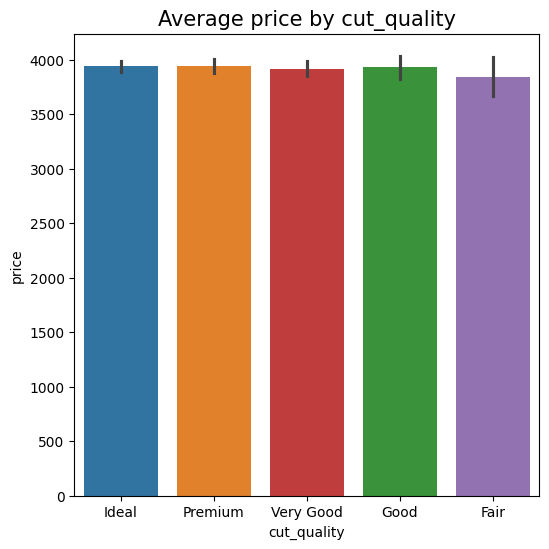

In [109]:
# Promedio de precio para los diamantes de cada categoría en 'cut_quality'
plt.figure(figsize = (6,6))
sns.barplot(data = df_diamonds, x="cut_quality", y="price", hue='cut_quality', palette='tab10', order=['Ideal', 'Premium', 'Very Good', 'Good', 'Fair'])
plt.title('Average price by cut_quality', fontsize=15)
plt.show()

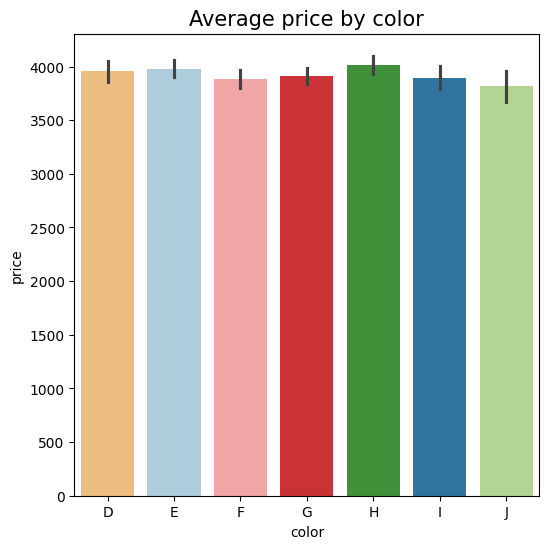

In [110]:
# Promedio de precio para los diamantes de cada categoría en 'color'
plt.figure(figsize = (6,6))
sns.barplot(data = df_diamonds, x="color", y="price", hue='color', palette='Paired', order=['D','E','F','G','H','I','J'])
plt.title('Average price by color', fontsize=15)
plt.show()

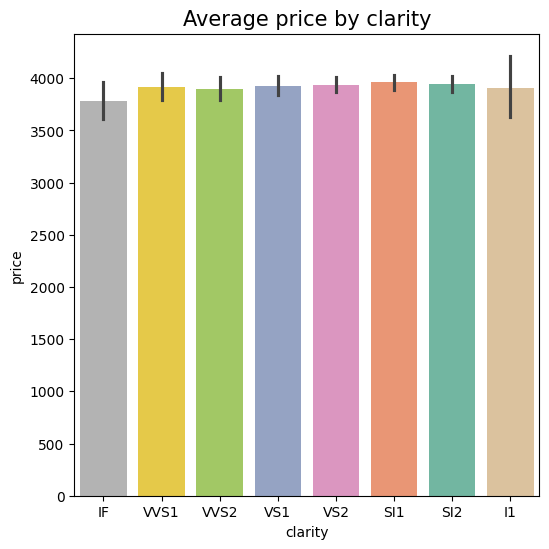

In [111]:
# Promedio de precio para los diamantes de cada categoría en 'clarity'
plt.figure(figsize = (6,6))
sns.barplot(data = df_diamonds, x="clarity", y="price", hue='clarity', palette='Set2', order=['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1'])
plt.title('Average price by clarity', fontsize=15)
plt.show()

Observaciones:
* Los gráficos de barras anteriores no proporcionan el valor del precio de un diamante según su categoría, solo indican que las categorías con un valor mayor en 'price' han contribuido más en la generación de ingresos en promedio. Esto puede deberse a que los diamantes de una categoría en particular se han vendido más.

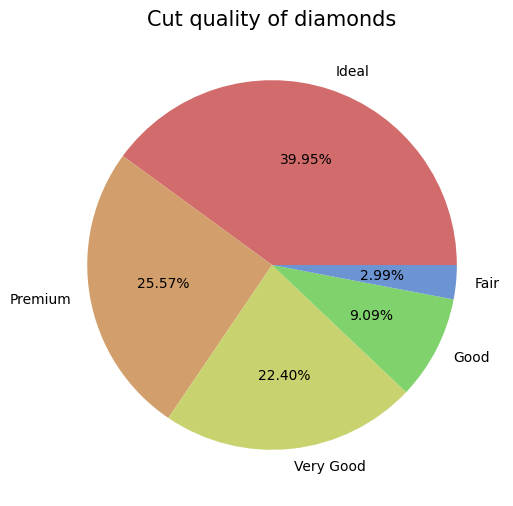

In [112]:
# Gráfica de pastel de la categoría en 'cut_quality'
plt.figure(figsize = (6,6))
plt.pie(df_diamonds_cat['cut_quality'].value_counts(), labels=df_diamonds_cat['cut_quality'].value_counts().index, autopct='%.2f%%', colors=['#d26c6c', '#d29f6c', '#c8d26e', '#80d26c', '#6c94d2'])
plt.title('Cut quality of diamonds', fontsize=15)
plt.show()

Observaciones: 
* La categoría de 'cut_quality' con mayor frecuencia en el set de datos es 'Ideal', mientras que la que tiene menos frecuencia es 'Fair'.

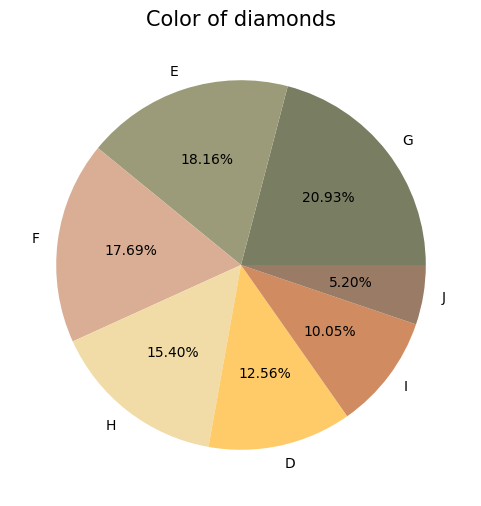

In [113]:
# Gráfica de pastel de la categoría en 'color'
plt.figure(figsize = (6,6))
plt.pie(df_diamonds_cat['color'].value_counts(), labels=df_diamonds_cat['color'].value_counts().index, autopct='%.2f%%', colors=['#797d62', '#9b9b7a', '#d9ae94','#f1dca7', '#ffcb69', '#d08c60','#997b66'])
plt.title('Color of diamonds', fontsize=15)
plt.show()

Observaciones: 
* La categoría de 'color' con mayor frecuencia en el set de datos es 'G', mientras que la que tiene menos frecuencia es 'J'.

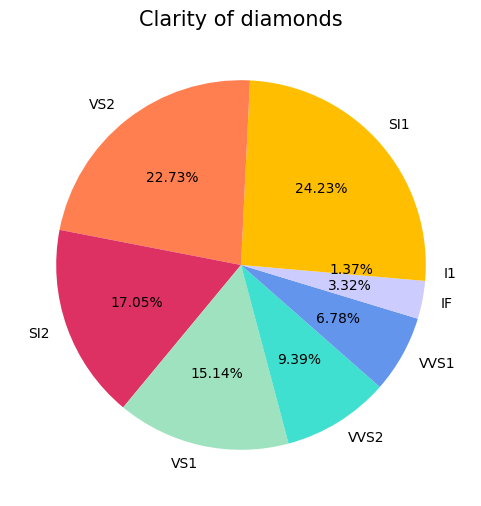

In [114]:
# Gráfica de pastel de la categoría en 'clarity'
plt.figure(figsize = (6,6))
plt.pie(df_diamonds_cat['clarity'].value_counts(), labels=df_diamonds_cat['clarity'].value_counts().index, autopct='%.2f%%', colors=['#FFBF00', '#FF7F50','#DE3163', '#9FE2BF', '#40E0D0','#6495ED','#CCCCFF'])
plt.title('Clarity of diamonds', fontsize=15)
plt.show()

Observación: 
* La categoría de 'clarity' con mayor frecuencia en el set de datos es 'SI1', mientras que la que tiene menos frecuencia es 'I1'.

### 5.2 Visualización de datos numéricos

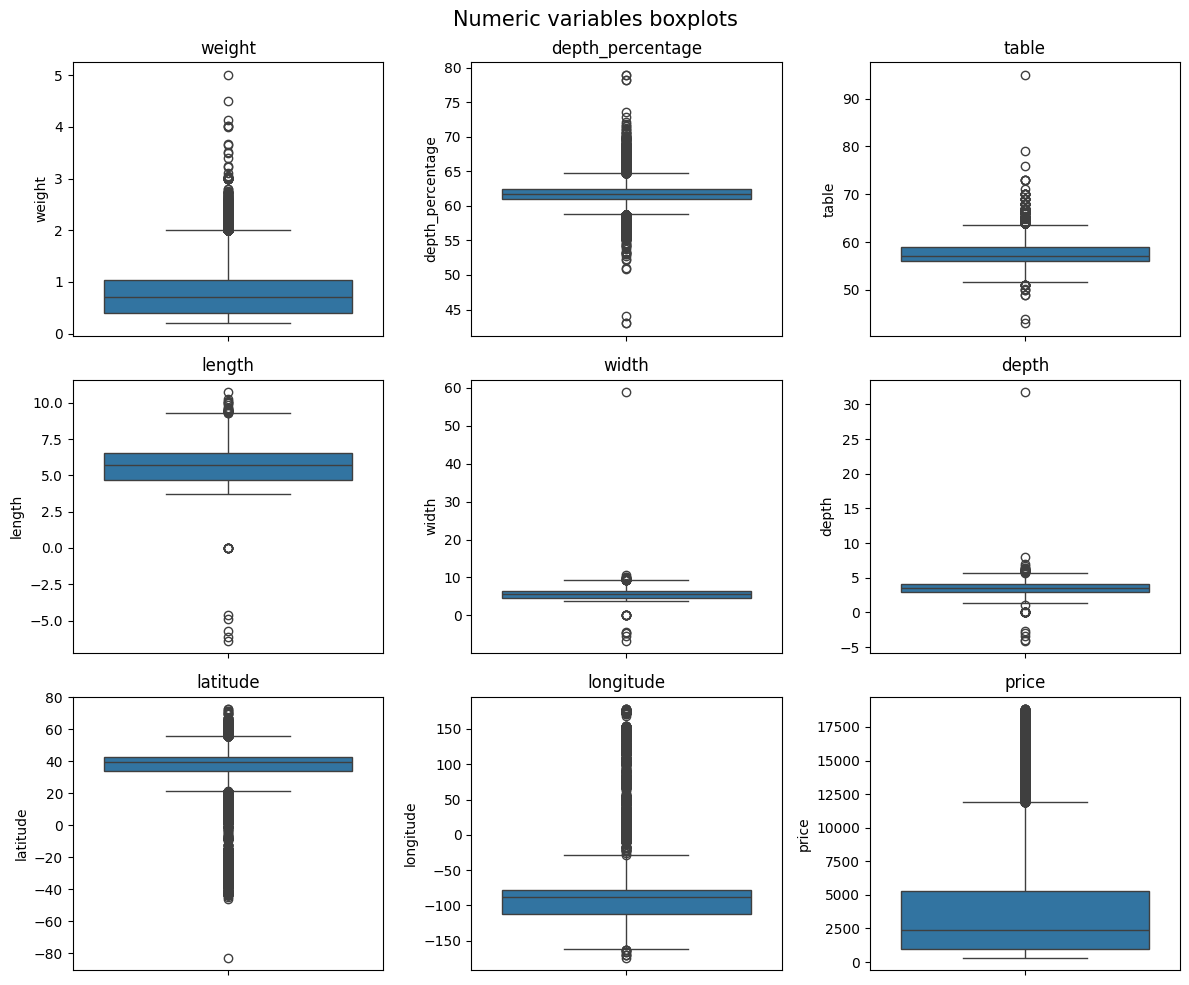

In [115]:
# Graficamos un diagrama de caja de cada variable numérica para visualizar los percentiles, rango intercuartil y valores atípicos

def plot_boxplot(data):
    k = 0 # Variable de control para las distintas columnas del dataframe
    n_cols = 3 # Cantidad de columnas para el gráfico
    n_rows = math.ceil(data.shape[1]/n_cols) # Cantidad de filas para el gráfico: Se divide la cantidad de variables a graficar entre el número de columnas. Esto se hace para tener suficientes filas ya que dependen del número de columnas.
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(12,10))
    fig.suptitle('Numeric variables boxplots', fontsize=15)
    for i in range(n_rows): # Variable de control que itera sobre las filas de la matriz del gráfico
        for j in range(n_cols): # Variable de control que itera sobre las columnas de la matriz del gráfico
            sns.boxplot(data, y=data[data.columns[k]], ax=axes[i][j]) # Se grafica el diagrama de caja
            axes[i][j].set_title(data.columns[k]) # Se asigna el título del gráfico mediante el uso de la variable 'k'
            plt.tight_layout() # Adecua el espacio entre cada gráfico
            if k < data.shape[1]:
                k=k+1 # Aumento de la variable de control k
    plt.show()

plot_boxplot(df_diamonds_num)

Observaciones: 
* Encontramos valores atípicos en todas las variables. Para tratar con este problema decidí eliminar algunos de los registros que contienen estos valores debido a que el set de datos presenta una cantidad lo suficientemente grande de datos como para no verse afectado al realizar un proceso de eliminación. Este cambio logrará que los modelos de machine learning que se apliquen sobre los datos generalicen de mejor manera.

Manejo de valores atípicos: Debido a que no tenemos la información completa acerca de la naturaleza de los datos, no podemos eliminar o transformar cualquier valor atípico. Debemos de limitarnos a asegurar que todos los datos presentes tengan valores coherentes dentro de la lógica del origen del valor. Por ejemplo, la mayoría de los datos se trata de mediciones, es decir que solo pueden tomar valores mayores a cero y es por esto por lo que se elimnan las medidas negativas o iguales a cero. Los valores extremos son otro caso en el que podemos eliminarlos directamente ya que se trata de valores que se alejan demasiado de la mayoría y en donde existe una alta probabilidad de que se trate de un error que puede alterar la estimación del valor.

Para determinar qué valores eliminar, podemos establecer un límite mínimo y máximo en cada variable. Los límites se fijan para dejar fuera valores que se distancían demasiado de los demás datos o, dado que muchas de las variables representan mediciones, se eliminan incongruencias como valores iguales o menores a 0.

* depth_percentage: Se elimnarán los valores menores a 50 y mayores a 75
* table: Se elimnarán los valores mayores a 90
* length: Se eliminarán los valores menores o iguales a 0
* width: Se elimnarán los valores menores o iguales a 0 y mayores a 20
* depth: Se elimnarán los valores menores o iguales a 0 y mayores a 10

In [116]:
# Eliminando valores atípicos
total_outliers = []

# Outliers de 'depth_percentage'
outliers = df_diamonds[(df_diamonds['depth_percentage'] < 50) | (df_diamonds['depth_percentage'] > 75)].index 
total_outliers.extend(outliers)

# Outliers de 'table'
outliers = df_diamonds[df_diamonds['table'] > 90].index
total_outliers.extend(outliers)

# Outliers de 'length'
outliers = df_diamonds[df_diamonds['length'] <= 0].index
total_outliers.extend(outliers)

# Outliers de 'width'
outliers = df_diamonds[(df_diamonds['width'] <= 0) | (df_diamonds['width'] > 20)].index
total_outliers.extend(outliers)

# Outliers de 'depth'
outliers = df_diamonds[(df_diamonds['depth'] <= 0) | (df_diamonds['depth'] > 10)].index
total_outliers.extend(outliers)

# Se eliminan todos los valores atípicos encontrados
df_diamonds.drop(total_outliers, axis=0, inplace=True)
df_diamonds_num.drop(total_outliers, axis=0, inplace=True)
df_diamonds_cat.drop(total_outliers, axis=0, inplace=True)

print(f'Valores atípicos eliminados: {len(total_outliers)} \t Esto representa el {np.round((len(total_outliers)*100)/df_diamonds.shape[0], 2)}% de los datos totales')

Valores atípicos eliminados: 60 	 Esto representa el 0.11% de los datos totales


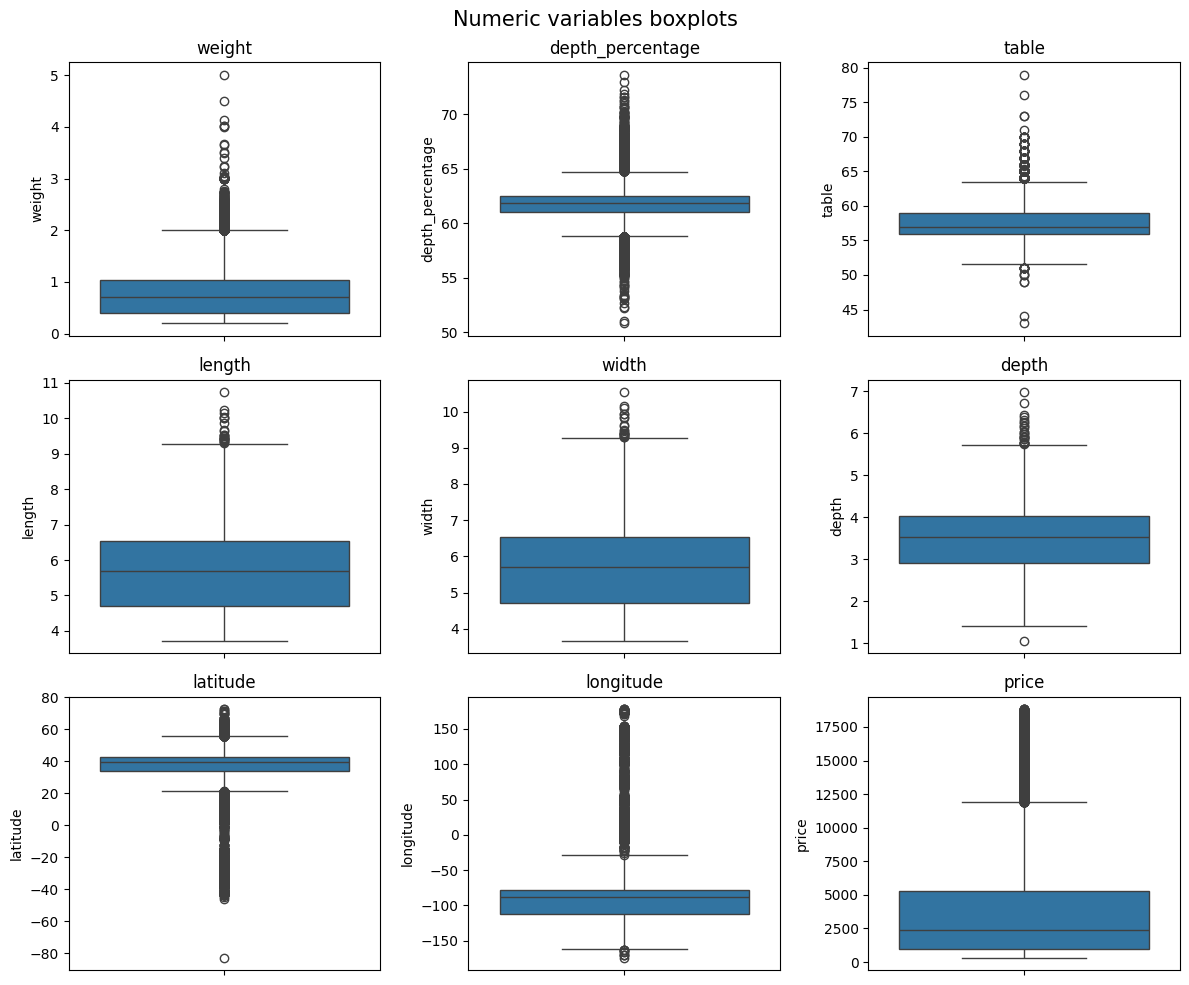

In [117]:
# Graficamos nuevamente los diagramas de caja para observar la diferencia
plot_boxplot(df_diamonds_num)

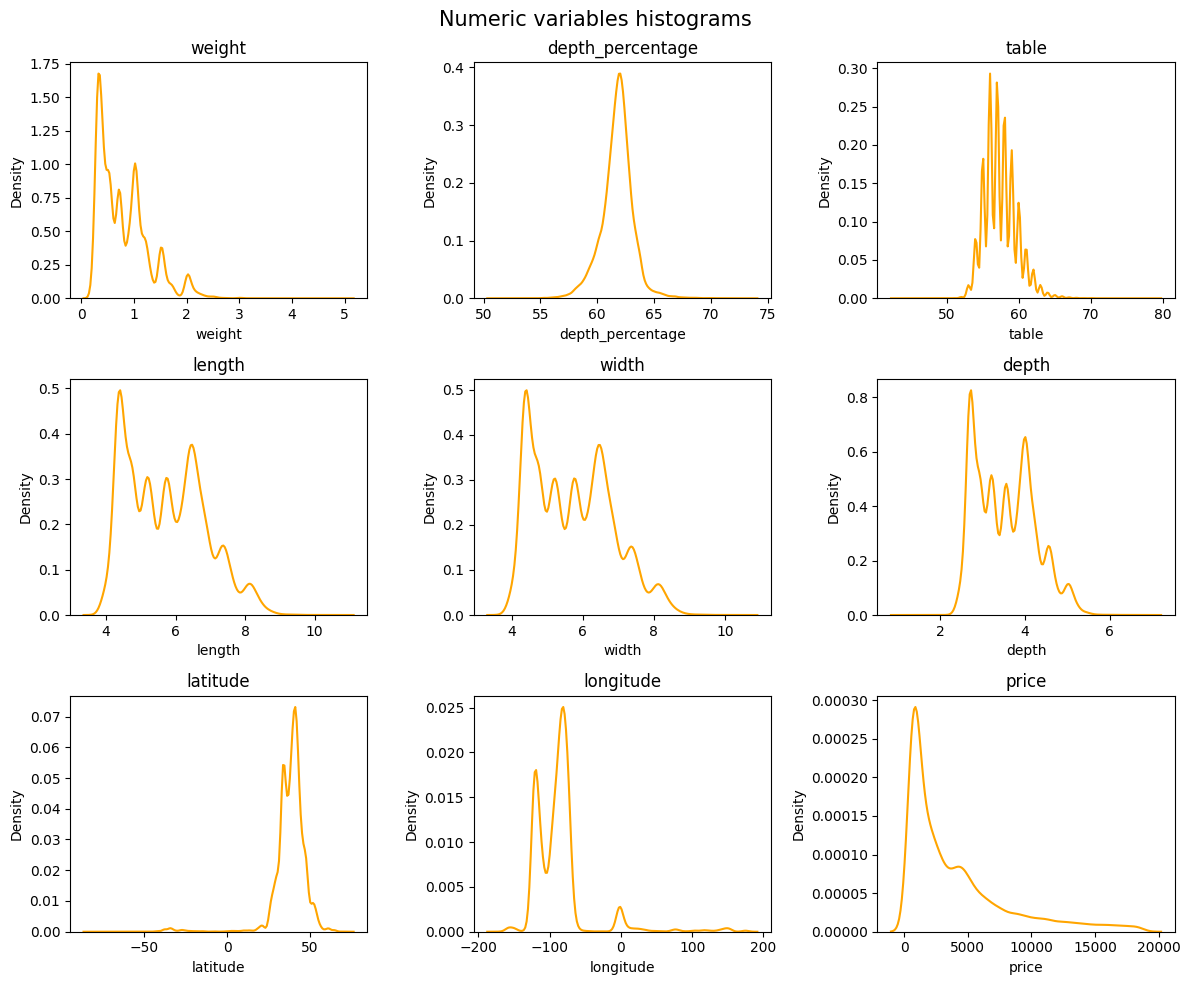

In [118]:
# Graficamos un histograma de cada variable numérica para visualizar su distribución

def plot_kde(data):
    k = 0 # Variable de control para las distintas columnas del dataframe
    n_cols = 3 # Cantidad de columnas para el gráfico
    n_rows = math.ceil(data.shape[1]/n_cols) # Cantidad de filas para el gráfico: Se divide la cantidad de variables a graficar entre el número de columnas. Esto se hace para tener suficientes filas ya que dependen del número de columnas. 

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(12,10))
    fig.suptitle('Numeric variables histograms', fontsize= 15)
    for i in range(n_rows): # Variable de control que itera sobre las filas de la matriz del gráfico
        for j in range(n_cols): # Variable de control que itera sobre las columnas de la matriz del gráfico
            sns.kdeplot(data, x=data[data.columns[k]], ax=axes[i][j], color='orange') # Se grafica el histograma
            axes[i][j].set_title(data.columns[k])
            plt.tight_layout() # Adecua el espacio entre cada gráfico
            if k < data.shape[1]:
                k=k+1 # Aumento de la variable de control k
    plt.show()

plot_kde(df_diamonds_num)

In [119]:
# Imprimimos el sesgo de cada variable numérica
df_diamonds.skew(numeric_only=True)

weight              1.116019
depth_percentage   -0.060148
table               0.705445
length              0.397763
width               0.392386
depth               0.393944
latitude           -3.787983
longitude           3.163751
price               1.618261
dtype: float64

Observaciones:
* La mayoría de las variables tienen un sesgo positivo (excepto 'depth_percentage' y 'latitude').
* Variables como 'weight', 'table', 'longitude' y 'price' tiene un sesgo más positivo.
* Otras variables como 'length', 'width' y 'depth' puede considerarse que tienen una distribución normal.

## Paso 6: Análisis bivariado y multivariado:

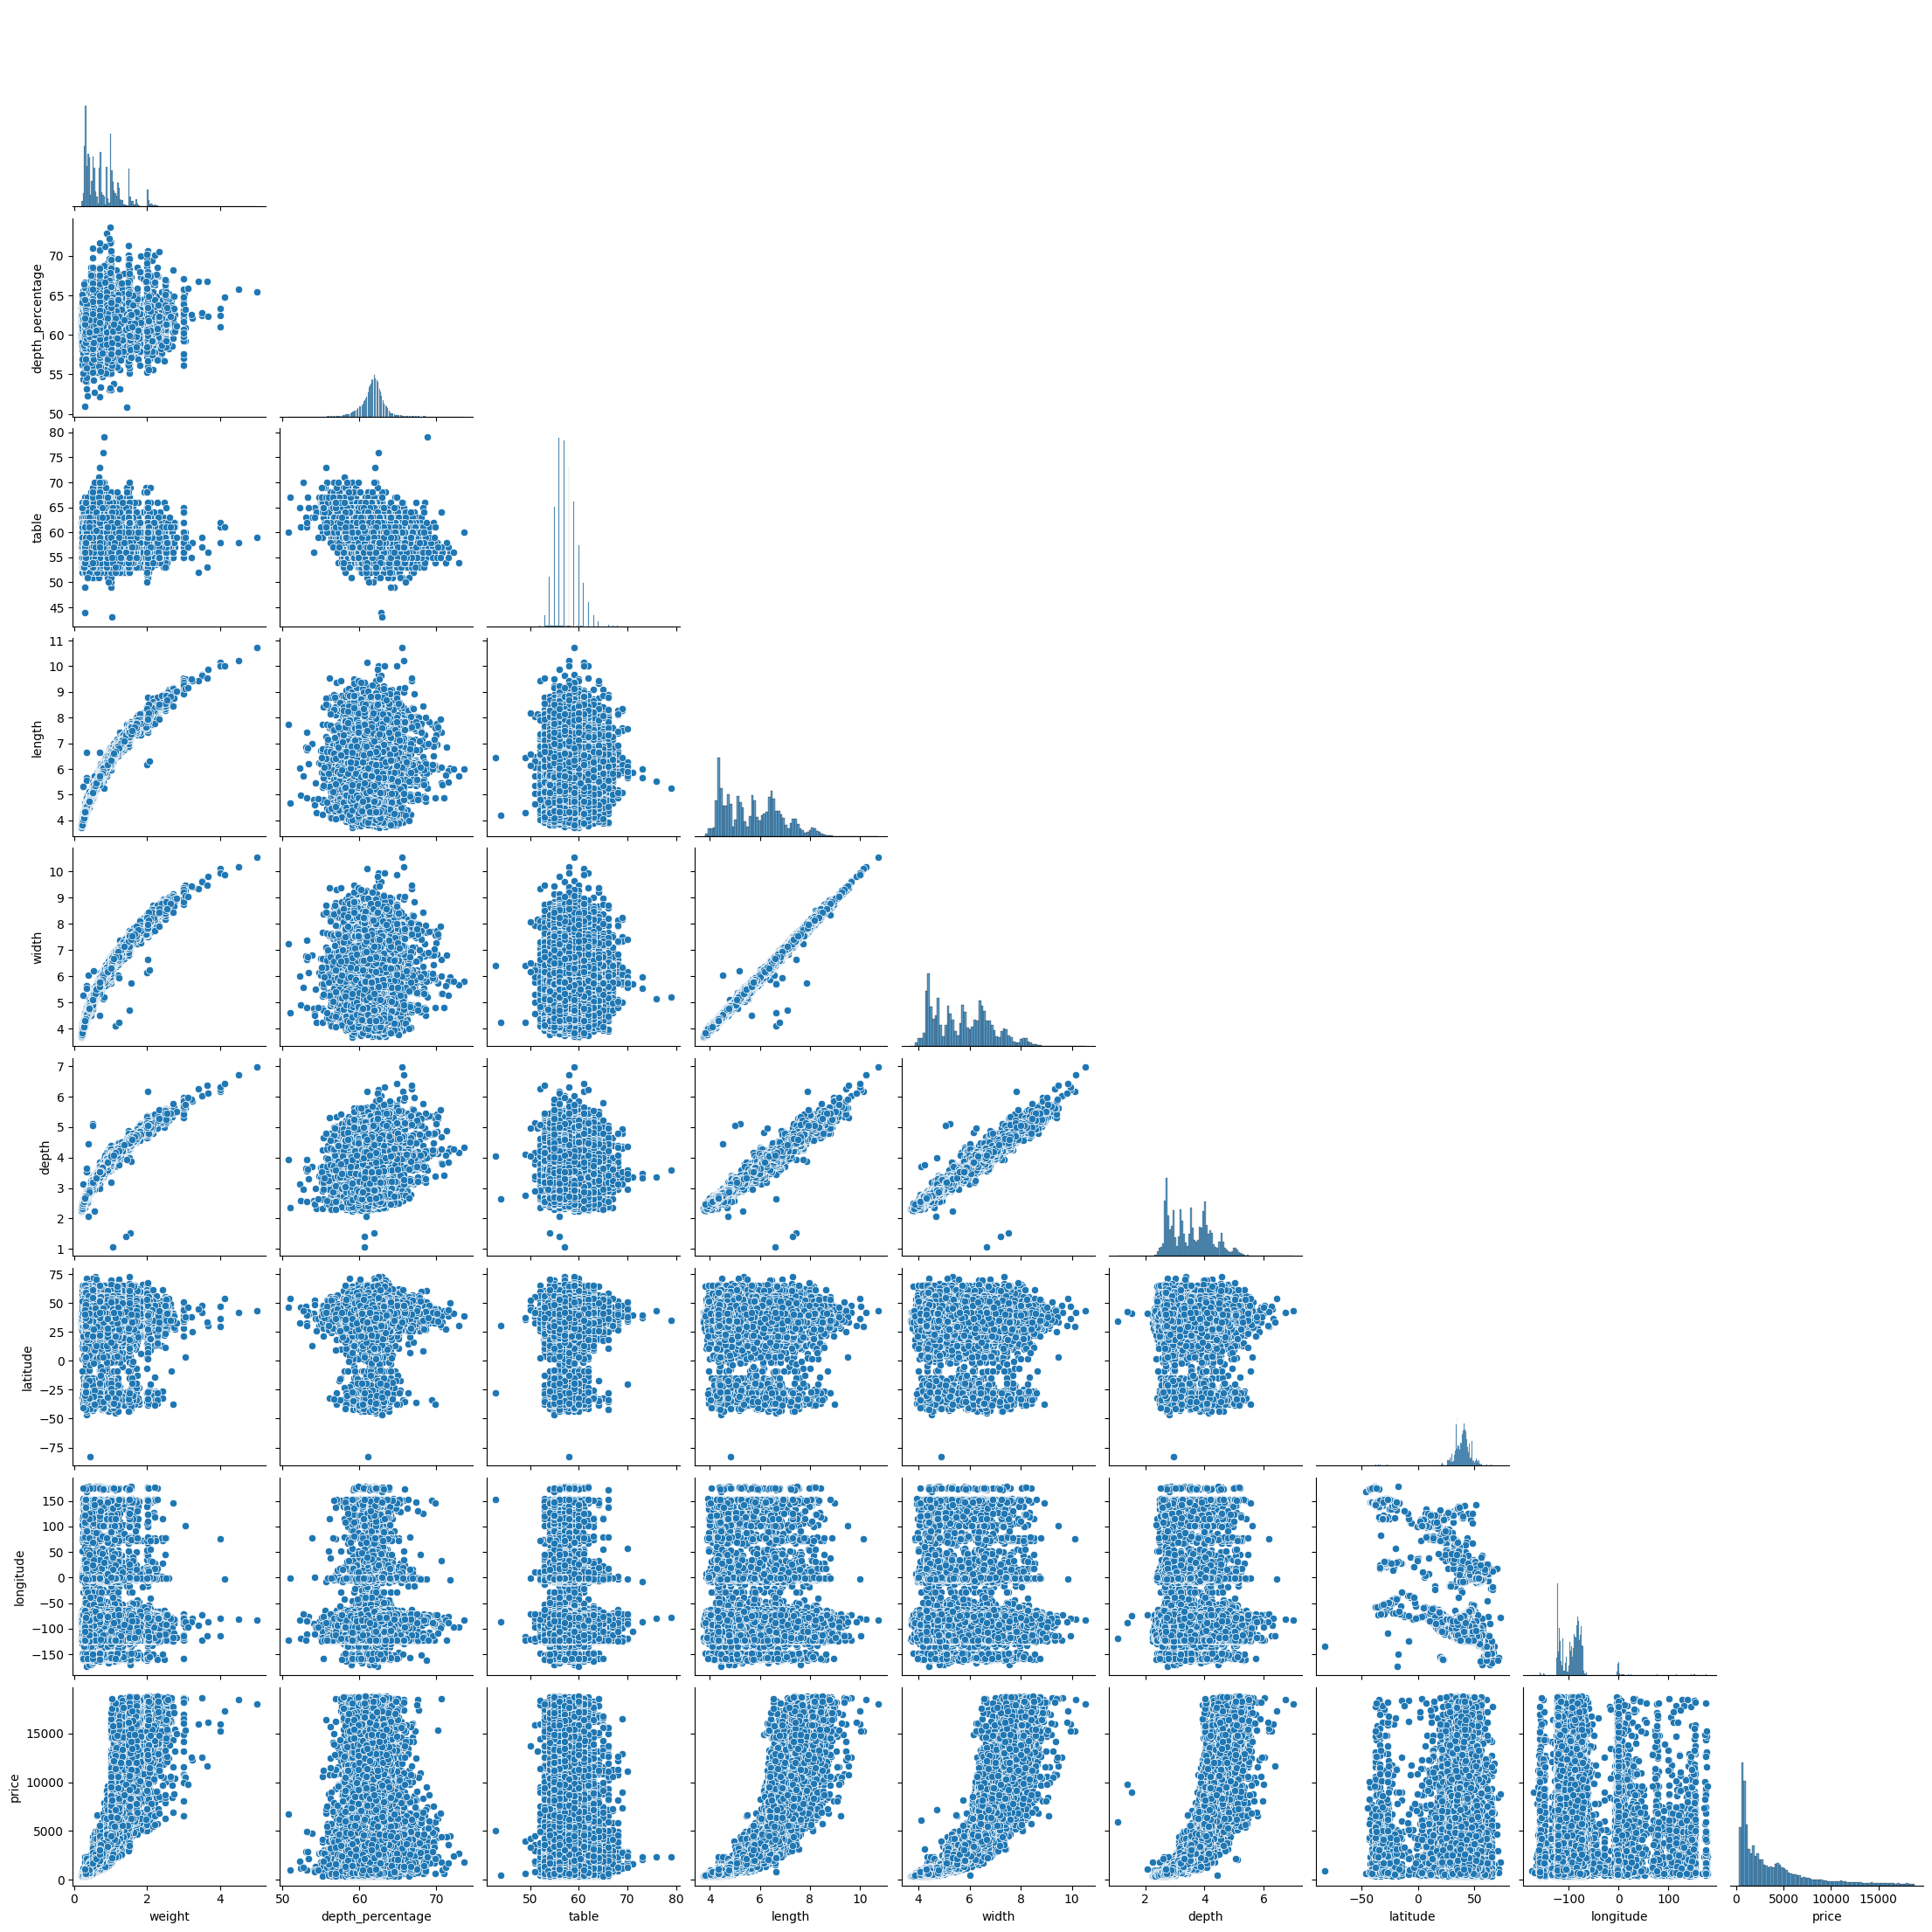

In [120]:
# Comenzamos realizando múltiples gráficas de dispersión con el objetivo de graficar todas las posibles relaciones entre variables numéricas organizadas por pares
sns.pairplot(df_diamonds, corner=True)
plt.show()

Observaciones:
* Haciendo énfasis en la variable 'price' podemos notar que tiene una correlación positiva con las variables 'weight', 'length', 'width' y 'depth'.
* Variables como 'depth_percentage', 'table', 'latitude' o 'longitude' no parecen tener una relación lineal positiva o negativa con esta variable.
* 'weight', 'length', 'width' y 'depth' son variables que tienen correlaciones positivas entre ellas. 

In [121]:
# Podemos visualizar estas relaciones de mejor manera con una matriz de correlación
df_diamonds.corr(numeric_only=True)

,weight,depth_percentage,table,length,width,depth,latitude,longitude,price
weight,1.000000,0.029785,0.181761,0.977759,0.976846,0.976449,-0.006335,0.005236,0.921596
depth_percentage,0.029785,1.000000,-0.303553,-0.023862,-0.027048,0.097962,0.001257,-0.002103,-0.009642
table,0.181761,-0.303553,1.000000,0.196402,0.190171,0.155740,-0.000709,0.006346,0.127092
length,0.977759,-0.023862,0.196402,1.000000,0.998653,0.991064,-0.005226,0.004948,0.887203
width,0.976846,-0.027048,0.190171,0.998653,1.000000,0.990715,-0.004779,0.004777,0.888768
depth,0.976449,0.097962,0.155740,0.991064,0.990715,1.000000,-0.004750,0.004921,0.882099
latitude,-0.006335,0.001257,-0.000709,-0.005226,-0.004779,-0.004750,1.000000,-0.383801,-0.005723
longitude,0.005236,-0.002103,0.006346,0.004948,0.004777,0.004921,-0.383801,1.000000,0.003578
price,0.921596,-0.009642,0.127092,0.887203,0.888768,0.882099,-0.005723,0.003578,1.000000


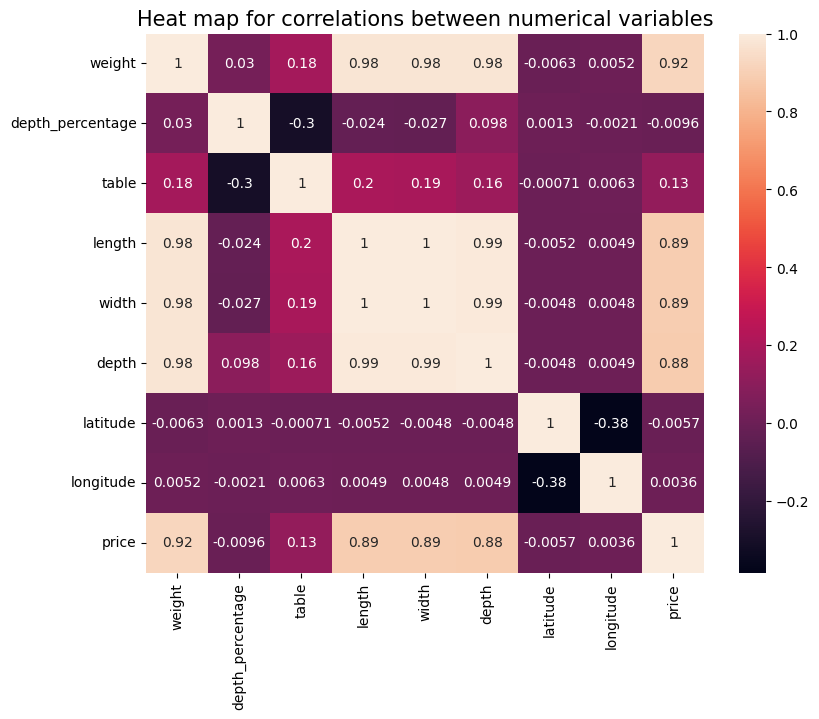

In [122]:
# O aún más claro, de forma gráfica con un mapa de calor
plt.figure(figsize = (9,7))
sns.heatmap(df_diamonds.corr(numeric_only=True), annot=True)
plt.title('Heat map for correlations between numerical variables', fontsize=15)
plt.show()

Observaciones:
* Nuevamente, al hacer énfasis en la variable 'price' podemos confirmar que tiene índices de correlación altos con las variables 'weight', 'length', 'width' y 'depth'. A su vez, se tienen índices de correlación bajos con 'depth_percentage', 'table', 'latitude' y 'longitude'.

Ahora que hemos comprobado las fuertes correlaciones que tiene el precio con otras variables numéricas, podemos profundizar en el comportamiento de las variables categóricas en esta relación.

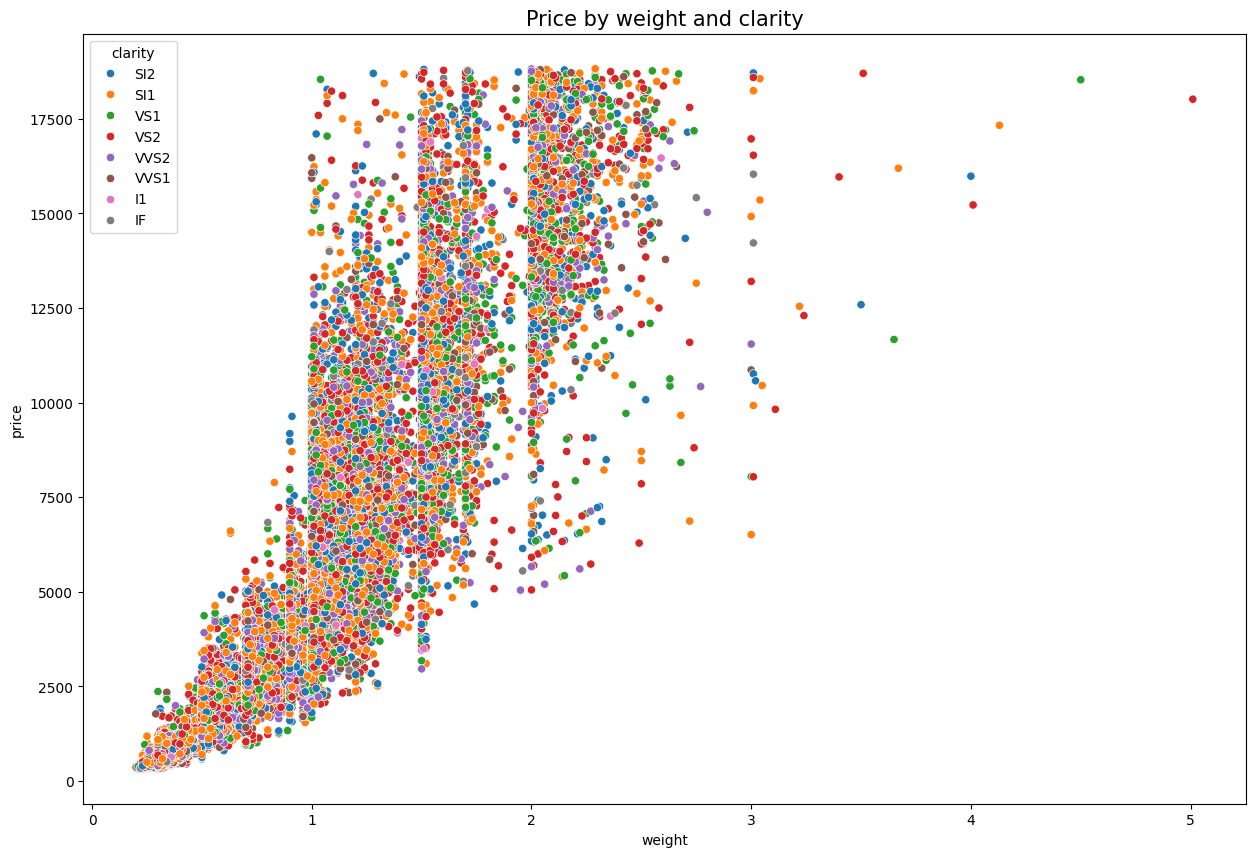

In [123]:
# Realizamos un gráfico de dispersión con 'price' y 'weight', pero visualizando también los patrones que ocurren con la categoría 'clarity' 
plt.figure(figsize=(15,10))
sns.scatterplot(df_diamonds, x='weight', y='price', hue='clarity')
plt.title('Price by weight and clarity', fontsize=15)
plt.show()

Observaciones:
* El precio del diamante aumenta cuando 'clarity' es de mejor calidad (IF y VVS1 son las mejores mientras que I1 y SI2 son las peores) a pesar de que 'weight' no tenga un valor alto.

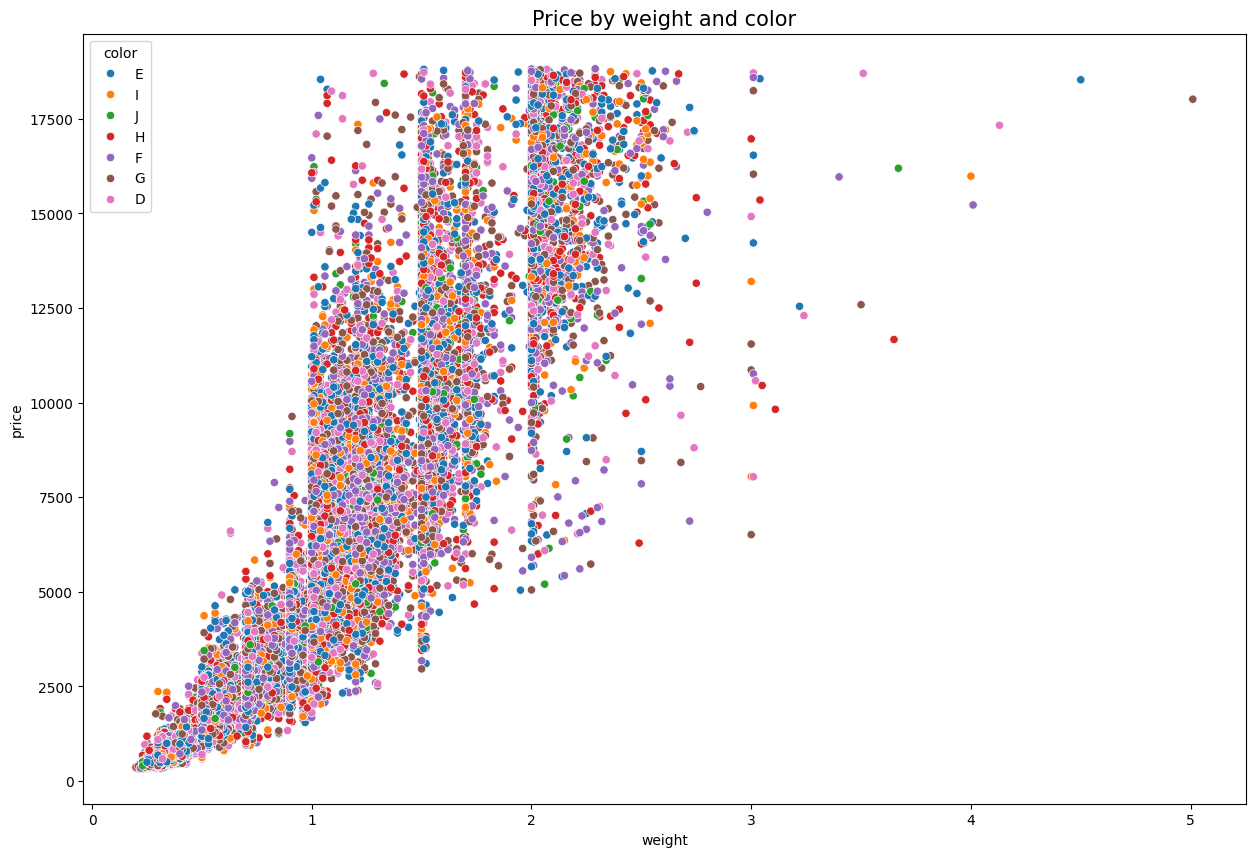

In [124]:
# Realizamos un gráfico de dispersión con 'price' y 'weight', pero visualizando también los patrones que ocurren con la categoría 'color' 
plt.figure(figsize=(15,10))
sns.scatterplot(df_diamonds, x='weight', y='price', hue='color')
plt.title('Price by weight and color', fontsize=15)
plt.show()

Observaciones:
* El precio del diamante aumenta cuando 'color' es de mejor calidad (D y E son las mejores mientras que I y J son las peores) a pesar de que 'weight' no tenga un valor alto.

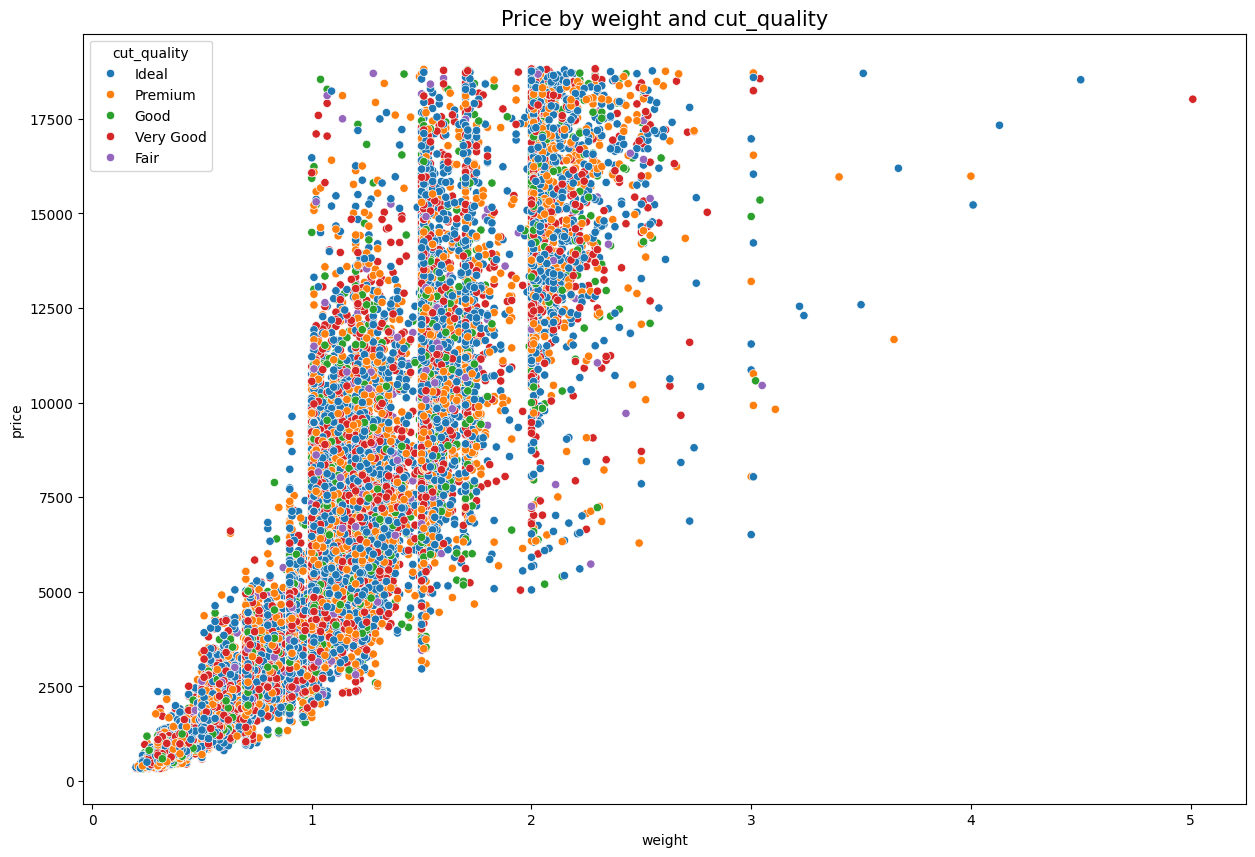

In [125]:
# Realizamos un gráfico de dispersión con 'price' y 'weight', pero visualizando también los patrones que ocurren con la categoría 'cut_quality' 
plt.figure(figsize=(15,10))
sns.scatterplot(df_diamonds, x='weight', y='price', hue='cut_quality')
plt.title('Price by weight and cut_quality', fontsize=15)
plt.show()

Observaciones:
* En este caso la categoría Ideal y Fair (mejor y peor) parecen tener una mayor acumulación en las regiones de peso alto y bajo, respectivamente. Sin embargo, este patrón no es tan marcado como en las gráficas anteriores.

## Paso 7. Resumen de hallazgos
* Debido a que nuestra variable objetivo (el precio) es una variable numérica discreta, es probable que una regresión lineal pueda satisfacer nuestro objetivo; estimar el precio de los diamantes robados del señor Krenk. 
* Existen variables con una correlación alta con la variable objetivo.
* Las variables categóricas presentan información importante en el comportamiento de los datos, por lo que deben de ser mapeadas para poder introducirse en el modelo.
* Algunas variables numéricas tienen distribuciones normales o cercanas a la normalidad.
* El set de datos contaba con valores atípicos extremos o incongruentes que ya han sido eliminados.

# Preprocesamiento y limpieza avanzada de los datos
---

## Paso 1. Selección de variables para el entrenamiento del modelo: 
Tomaremos las variables con correlaciones altas y las variables categóricas. Todas estas variables aportan información importante para predecir el precio. 

In [126]:
# Construimos un DataFrame con las columnas deseadas
df_diamonds_model = df_diamonds[['weight', 'length', 'width', 'depth', 'cut_quality', 'color', 'clarity', 'price']]
df_diamonds_model

,weight,length,width,depth,cut_quality,color,clarity,price
0,1.09,6.57,6.49,4.17,Ideal,E,SI2,7493
1,0.70,5.67,5.75,3.55,Premium,E,SI1,2325
2,0.78,5.95,6.00,3.62,Good,E,VS1,3401
3,0.30,4.32,4.34,2.67,Premium,I,VS2,764
4,1.39,7.26,7.24,4.37,Good,J,SI2,6366
...,...,...,...,...,...,...,...,...
53925,1.58,7.50,7.55,4.59,Ideal,D,SI1,13434
53926,0.32,4.33,4.36,2.72,Good,D,SI1,589
53927,0.30,4.32,4.31,2.68,Very Good,D,SI1,1094
53928,1.13,6.69,6.74,4.17,Premium,H,SI2,7140


## Paso 2. Falta de normalidad en la distribución de las variables numéricas: 

In [127]:
# Las variables 'weight' y 'price' necesitan aproximar más su distribución a una normal
# Podemos aplicar la tranformación de BoxCox para transformar la distribución sesgada de las variables en una distribución normal
from scipy import stats

# Tranformación de BoxCox para 'price'
df_diamonds_model['price_boxcox'], lambda_val = stats.boxcox(df_diamonds_model['price'])
print(f'Valor de lambda para el precio: {lambda_val}\n')

# Tranformación de BoxCox para 'weight'
df_diamonds_model['weight_boxcox'], lambda_val = stats.boxcox(df_diamonds_model['weight'])
print(f'Valor de lambda para el peso: {lambda_val}\n')

# Valores resultantes de ambos procesos
df_diamonds_model.head()

C:\Users\Axel\AppData\Local\Temp\ipykernel_25124\1110673012.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_diamonds_model['price_boxcox'], lambda_val = stats.boxcox(df_diamonds_model['price'])


Valor de lambda para el precio: -0.06704592758048958

Valor de lambda para el peso: -0.09495569932444989



C:\Users\Axel\AppData\Local\Temp\ipykernel_25124\1110673012.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_diamonds_model['weight_boxcox'], lambda_val = stats.boxcox(df_diamonds_model['weight'])


,weight,length,width,depth,cut_quality,color,clarity,price,price_boxcox,weight_boxcox
0,1.09,6.57,6.49,4.17,Ideal,E,SI2,7493,6.714510,0.085826
1,0.70,5.67,5.75,3.55,Premium,E,SI1,2325,6.045169,-0.362784
2,0.78,5.95,6.00,3.62,Good,E,VS1,3401,6.268502,-0.251415
3,0.30,4.32,4.34,2.67,Premium,I,VS2,764,5.358009,-1.275494
4,1.39,7.26,7.24,4.37,Good,J,SI2,6366,6.624399,0.324208


Ambos valores de lambda indican el tipo de transformación que se realizó mediante la función BoxCox.

In [128]:
# Eliminamos las columnas que no contiene distribuciones normales
df_diamonds_model = df_diamonds_model.drop(['price', 'weight'], axis=1)
df_diamonds_model

,length,width,depth,cut_quality,color,clarity,price_boxcox,weight_boxcox
0,6.57,6.49,4.17,Ideal,E,SI2,6.714510,0.085826
1,5.67,5.75,3.55,Premium,E,SI1,6.045169,-0.362784
2,5.95,6.00,3.62,Good,E,VS1,6.268502,-0.251415
3,4.32,4.34,2.67,Premium,I,VS2,5.358009,-1.275494
4,7.26,7.24,4.37,Good,J,SI2,6.624399,0.324208
...,...,...,...,...,...,...,...,...
53925,7.50,7.55,4.59,Ideal,D,SI1,7.029304,0.447633
53926,4.33,4.36,2.72,Good,D,SI1,5.189857,-1.203360
53927,4.32,4.31,2.68,Very Good,D,SI1,5.585316,-1.275494
53928,6.69,6.74,4.17,Premium,H,SI2,6.687934,0.121511


In [129]:
# Cambiamos el nombre de las columnas creadas mediante BoxCox
df_diamonds_model = df_diamonds_model.rename(columns={'price_boxcox': 'price', 'weight_boxcox': 'weight'})
df_diamonds_model

,length,width,depth,cut_quality,color,clarity,price,weight
0,6.57,6.49,4.17,Ideal,E,SI2,6.714510,0.085826
1,5.67,5.75,3.55,Premium,E,SI1,6.045169,-0.362784
2,5.95,6.00,3.62,Good,E,VS1,6.268502,-0.251415
3,4.32,4.34,2.67,Premium,I,VS2,5.358009,-1.275494
4,7.26,7.24,4.37,Good,J,SI2,6.624399,0.324208
...,...,...,...,...,...,...,...,...
53925,7.50,7.55,4.59,Ideal,D,SI1,7.029304,0.447633
53926,4.33,4.36,2.72,Good,D,SI1,5.189857,-1.203360
53927,4.32,4.31,2.68,Very Good,D,SI1,5.585316,-1.275494
53928,6.69,6.74,4.17,Premium,H,SI2,6.687934,0.121511


In [130]:
# Cambiamos el orden en que se presentan las columnas
df_diamonds_model = df_diamonds_model[['weight', 'length', 'width', 'depth', 'cut_quality', 'color', 'clarity', 'price']]
df_diamonds_model.head()

,weight,length,width,depth,cut_quality,color,clarity,price
0,0.085826,6.57,6.49,4.17,Ideal,E,SI2,6.714510
1,-0.362784,5.67,5.75,3.55,Premium,E,SI1,6.045169
2,-0.251415,5.95,6.00,3.62,Good,E,VS1,6.268502
3,-1.275494,4.32,4.34,2.67,Premium,I,VS2,5.358009
4,0.324208,7.26,7.24,4.37,Good,J,SI2,6.624399


In [131]:
# Las variables 'length', 'width' y 'depth' tienen distribuciones cercanas a la normalidad
# Podemos aplicar una tranformación logarítmica para aproximar aún más estas distribuciones a una normal

# Aplicamos la tranformación logarítmica a las columnas de interés 
for feature in df_diamonds_model.columns[1:4]:
    df_diamonds_model[feature] = np.log(df_diamonds_model[feature])

df_diamonds_model

,weight,length,width,depth,cut_quality,color,clarity,price
0,0.085826,1.882514,1.870263,1.427916,Ideal,E,SI2,6.714510
1,-0.362784,1.735189,1.749200,1.266948,Premium,E,SI1,6.045169
2,-0.251415,1.783391,1.791759,1.286474,Good,E,VS1,6.268502
3,-1.275494,1.463255,1.467874,0.982078,Premium,I,VS2,5.358009
4,0.324208,1.982380,1.979621,1.474763,Good,J,SI2,6.624399
...,...,...,...,...,...,...,...,...
53925,0.447633,2.014903,2.021548,1.523880,Ideal,D,SI1,7.029304
53926,-1.203360,1.465568,1.472472,1.000632,Good,D,SI1,5.189857
53927,-1.275494,1.463255,1.460938,0.985817,Very Good,D,SI1,5.585316
53928,0.121511,1.900614,1.908060,1.427916,Premium,H,SI2,6.687934


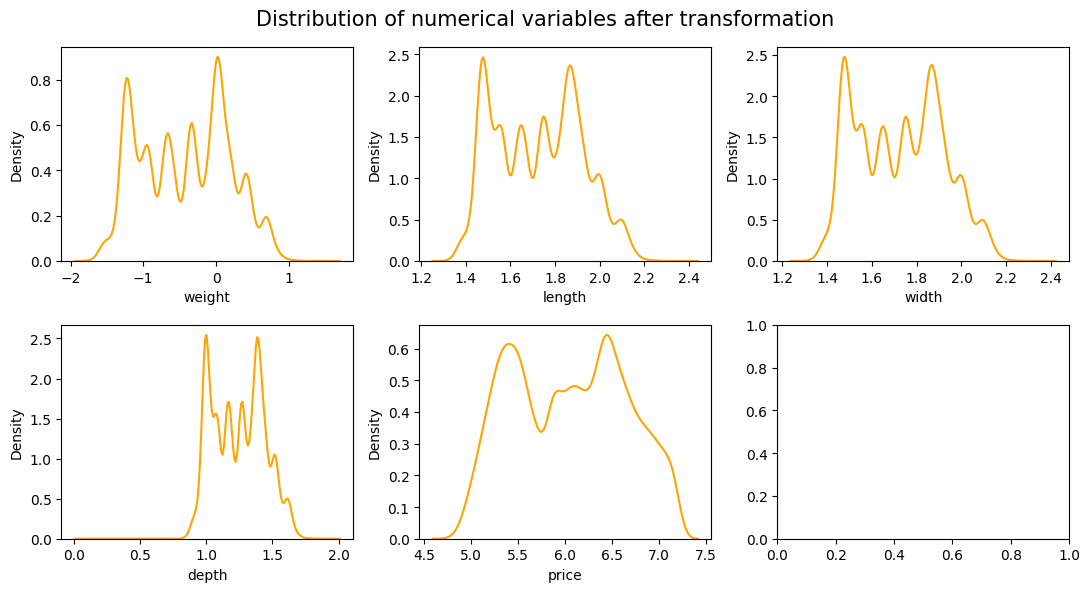

In [132]:
# Graficamos la distribución de las variables numéricas después de la transformación
fig, axes = plt.subplots(2, 3, figsize=(11, 6)) 
fig.suptitle('Distribution of numerical variables after transformation', fontsize= 15)

sns.kdeplot(data=df_diamonds_model, x="weight", ax=axes[0,0], color='orange' )
sns.kdeplot(data=df_diamonds_model, x="length", ax=axes[0,1], color='orange' )
sns.kdeplot(data=df_diamonds_model, x="width", ax=axes[0,2], color='orange' )
sns.kdeplot(data=df_diamonds_model, x="depth", ax=axes[1,0], color='orange' )
sns.kdeplot(data=df_diamonds_model, x="price", ax=axes[1,1], color='orange')
plt.tight_layout()

plt.show()

In [133]:
# Una vez más imprimimos el sesgo de cada variable numérica
df_diamonds_model.skew(numeric_only=True)

weight    0.020468
length    0.104423
width     0.102875
depth     0.094831
price     0.025604
dtype: float64

Ahora, todos los valores están aún más próximos a 0 (distribución normal), especialmente 'price' y 'weight'.

## Paso 3. Mapeo o codificación de variables categóricas:

In [134]:
# Mapeamos nuestras categorías con un codificador ordinal
import category_encoders as ce

encoder = ce.OrdinalEncoder(cols=["cut_quality", "color", "clarity"])

# Fit and transform the data using ordinal encoding
df_diamonds_model = encoder.fit_transform(df_diamonds_model, mapping=[['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'], 
                                                                      ['J', 'I', 'H', 'G', 'F', 'E', 'D'], 
                                                                      ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']])
df_diamonds_model

,weight,length,width,depth,cut_quality,color,clarity,price
0,0.085826,1.882514,1.870263,1.427916,1,1,1,6.714510
1,-0.362784,1.735189,1.749200,1.266948,2,1,2,6.045169
2,-0.251415,1.783391,1.791759,1.286474,3,1,3,6.268502
3,-1.275494,1.463255,1.467874,0.982078,2,2,4,5.358009
4,0.324208,1.982380,1.979621,1.474763,3,3,1,6.624399
...,...,...,...,...,...,...,...,...
53925,0.447633,2.014903,2.021548,1.523880,1,7,2,7.029304
53926,-1.203360,1.465568,1.472472,1.000632,3,7,2,5.189857
53927,-1.275494,1.463255,1.460938,0.985817,4,7,2,5.585316
53928,0.121511,1.900614,1.908060,1.427916,2,4,1,6.687934


# Modelado de la regresión lineal
---

In [135]:
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

# Dividimos el set de datos en variables predictoras y variable objetivo
X = df_diamonds_model.drop('price', axis=1)
y = df_diamonds_model['price']

# Dividimos nuevamente los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=11)

# Creamos un pipeline para unificar los procesos de escalamiento y regresión lineal
ss = StandardScaler()
lr = LinearRegression()

estimator = Pipeline([("scaler", ss),
                      ("linear_regression", lr)])

estimator.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_regression', LinearRegression())])

In [136]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

# Validación cruzada con R2 score:
# Este es un método para evaluar la precisión del modelo, sobre todo para generalizar a datos nuevos. El score 
# es el coeficiente de determinación que se calcula en varias particiones del conjunto de datos en lugar de en 
# un único conjunto de entrenamiento y prueba. Es por esto que es una evaluación del modelo más robusta.

cv = ShuffleSplit(n_splits=5, test_size=0.30, random_state=22) # Genera 5 particiones de los datos aleatoriamente
linear_reg_r2_score = cross_val_score(estimator, X, y, cv=cv, scoring='r2').mean().round(4)
print('Validación cruzada con R2 score:', linear_reg_r2_score)

Validación cruzada con R2 score: 0.935


Conclusiones:
* Gracias al análisis exploratorio de los datos (EDA) realizado en este proyecto, pudimos conocer mejor las características de diferentes diamantes, ¡casi como si fuéramos un lapidario experto! Extraer información del set de datos resultó muy útil para conocer más acerca del comportamiento de las variables y su validez en la construcción de un modelo de regresión lineal para estimar el precio.
* El uso de gráficas nos permite entender patrones en los datos y nos ayuda a expresar dichos descubrimientos de manera visual, una forma mucho más simple de comprender para cualquier persona.
* El modelo de regresión lineal que utilizamos alcanzó una precisión del 93.45% con una validación cruzada con R2 score. Esto es positivo ya que significa que nuestro modelo puede ser utilizado para estimar el precio de diamantes con características nunca antes procesadas por este modelo, como los diamantes robados del señor Krenk.
* La construcción, el entrenamiento y la evaluación del modelo fueron realizados con ciertos métodos pero no significa que sean los únicos. Existe una gran variedad de maneras de estimar el valor del precio, estas pueden ser probadas en busca de un mejor desempeño que estime con mayor precisión el valor deseado.